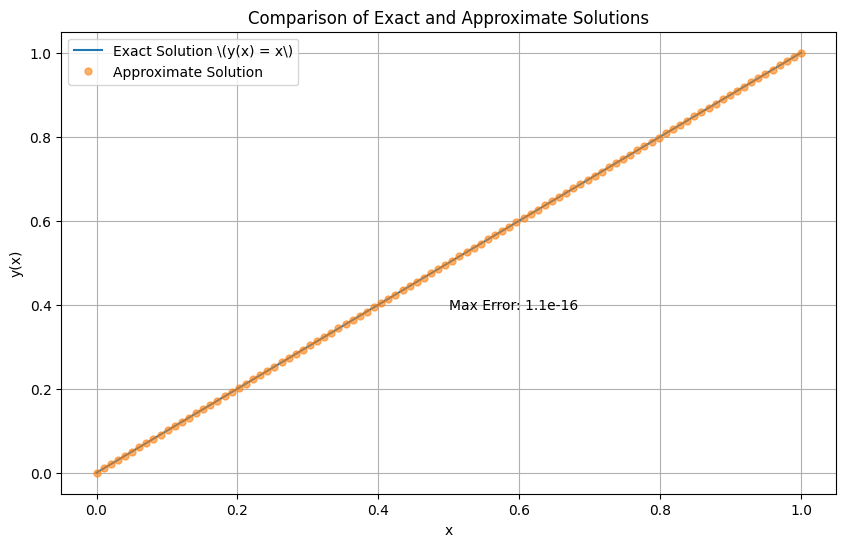

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

# Define the integral equation
def integral_equation(x, y_func):
    # Inner integral function
    def integrand(s):
        return x * s * y_func(s)
    
    # Compute the definite integral from 0 to 1
    integral_value, _ = quad(integrand, 0, 1)
    return (5/6) * x + (1/2) * integral_value

# Since the exact solution y(x) = x is known, we can define it
def exact_solution(x):
    return x

# We can now use the exact solution to evaluate the integral equation
# and check if it satisfies the equation
x_values = np.linspace(0, 1, 100)  # Generate 100 points between 0 and 1
y_values = [integral_equation(x, exact_solution) for x in x_values]

# The y_values should be approximately equal to the x_values if the integral equation is correct
# Let's calculate the maximum error to see how close they are
errors = np.abs(y_values - x_values)
max_error = np.max(errors)

max_error, y_values[:10]  # Display the maximum error and the first 10 y values


# We'll plot the exact solution and the approximate solution together
# For the approximate solution, we're using the y_values we just calculated
# which should be the same as the x_values since we used the exact solution to calculate them

# Generate a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Plot the exact solution
plt.plot(x_values, x_values, label='Exact Solution \(y(x) = x\)')

# Plot the approximate solution
plt.plot(x_values, y_values, 'o', label='Approximate Solution', markersize=5, alpha=0.6)

# Annotate the maximum error on the plot
plt.annotate(f'Max Error: {max_error:.1e}', xy=(0.5, 0.4), xycoords='axes fraction')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Comparison of Exact and Approximate Solutions')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
